# Import Libraries and Data

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import torch
import torch.nn as nn
from tqdm import tqdm

from sklearn.metrics import roc_auc_score

In [86]:
DATA_PATH = '../data'
MODEL_PATH = '../src/models'

### Util Functions

In [87]:
def train_valid_test_split(X, y, TEST_SIZE=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size = TEST_SIZE, 
        random_state=random_state
    )

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, 
        y_train, 
        test_size = TEST_SIZE, 
        random_state=random_state
    )

    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [88]:
def get_metrics(pred, actual, display=True):
    cm = confusion_matrix(actual, pred)
    tn, fp, fn, tp = cm.ravel()

    TPR = tp / (tp + fn)
    FPR = tn / (tn + fp)
    roc_auc = roc_auc_score(actual, pred)
    if (display):
        print(f"Accuracy: {np.mean(pred == actual):.4f}")
        print(f"tn:  {tn},  fp:  {fp},  fn:  {fn}, tp:  {tp}")
        print(f"Precision:\t\t\t{tp / (tp + fp):.5f}")
        print(f"Recall:\t\t\t\t{tp / (tp + fn):.5f}")
        print(f"TPR:\t\t\t\t{TPR:.5f}")
        print(f"FPR:\t\t\t\t{FPR:.5f}")
        print(f"Positive likelihood ratio:\t{TPR/FPR:.5f}")
        print(f"Negative likelihood ratio:\t{FPR/TPR:.5f}")
        print(f"ROC-AUC Score:\t{roc_auc:.5f}")
        return
    return [tn, fp, fn, tp, TPR, FPR, TPR/FPR, FPR/TPR, roc_auc]

## Final Feature Matrix

In [89]:
# Get Logistic Regression Data
feature_matrix = pd.read_csv(f'{DATA_PATH}/processed/log_reg_feature_matrix.csv')
feature_matrix.head()

,FPF_TARGET,total_balance,maxUNCATEGORIZED,minOVERDRAFT,maxbalance,maxTRAVEL,meanATM_CASH,medianAUTOMOTIVE,maxSELF_TRANSFER,meanGIFTS_DONATIONS,...,TRAVEL_slp,OVERDRAFT_prop,GENERAL_MERCHANDISE_count,non_ess_ratio,ACCOUNT_FEES_prop,medianMORTGAGE,minCREDIT_CARD_PAYMENT,minBNPL,minEDUCATION,minAUTOMOTIVE
0,0.0,857.150161,4356.28,0.0,253.01,22.22,148.951058,15.610,1000.0,5.980000,...,4.401429,0.000000,15.384615,0.493247,0.000184,1372.41,3.63,0.0,33.26,2.00
1,0.0,43016.714011,140000.00,0.0,31564.64,499.20,798.992093,43.735,3000.0,34.666667,...,-9.023187,0.000000,31.230769,0.742167,0.000366,0.00,10.48,0.0,10.00,2.19
2,0.0,14667.666944,104.88,0.0,31229.66,208.27,371.463507,26.330,8000.0,0.000000,...,73.852000,0.000000,16.307692,0.670625,0.000391,0.00,2.39,0.0,0.00,1.71
3,0.0,-4188.933058,905.00,0.0,6425.61,11.20,220.968750,21.000,0.0,40.000000,...,0.000000,0.000000,19.846154,0.392372,0.001479,0.00,10.00,0.0,20.00,4.13
4,0.0,-2630.480387,2109.36,0.5,1009.99,555.00,94.496111,51.160,0.0,20.800000,...,-60.738667,0.057938,20.692308,0.744914,0.000838,0.00,100.00,0.0,56.45,1.91


In [90]:
# Train Test Split
TEST_SIZE = 0.2
X = feature_matrix.iloc[:,1:].to_numpy()
y = feature_matrix.iloc[:,0].to_numpy()

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(
    X, 
    y, 
    TEST_SIZE = TEST_SIZE, 
    random_state = 42
)

# Prototype Model to Predict Default Risk

### Training

In [91]:
lin_model = linear_model.LogisticRegression(max_iter=10000)

In [92]:
lin_model.fit(X_train, y_train)

/Users/darrenjiang/opt/anaconda3/envs/dsc180/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

### Evaluate Model

In [93]:
valid_pred = lin_model.predict(X_valid)
test_pred = lin_model.predict(X_test)

In [94]:
print("Validation:")
get_metrics(valid_pred, y_valid)
print("===========================")
print("Test:")
get_metrics(test_pred, y_test)

Validation:
Accuracy: 0.7841
tn:  355,  fp:  20,  fn:  83, tp:  19
Precision:			0.48718
Recall:				0.18627
TPR:				0.18627
FPR:				0.94667
Positive likelihood ratio:	0.19677
Negative likelihood ratio:	5.08211
ROC-AUC Score:	0.56647
Test:
Accuracy: 0.8423
tn:  484,  fp:  14,  fn:  80, tp:  18
Precision:			0.56250
Recall:				0.18367
TPR:				0.18367
FPR:				0.97189
Positive likelihood ratio:	0.18899
Negative likelihood ratio:	5.29139
ROC-AUC Score:	0.57778


# Prototype 2: Basic Sequential NN

### Get Data

In [95]:
# Get SNN Data
feature_matrix = pd.read_csv(f'{DATA_PATH}/processed/SNN_feature_matrix.csv')
feature_matrix.head()

,FPF_TARGET,LOAN_mean,meanEXTERNAL_TRANSFER,medianMORTGAGE,medianINSURANCE,meanLOAN,minESSENTIAL_SERVICES,ATM_CASH_mean,medianFOOD_AND_BEVERAGES,GROCERIES_count,...,medianOVERDRAFT,RENT_prop,medianUNCATEGORIZED,meanCREDIT_CARD_PAYMENT,medianGIFTS_DONATIONS,minBNPL,maxbalance,TAX_prop,minENTERTAINMENT,meanAUTOMOTIVE
0,0.0,345.082200,79.478235,1372.41,87.50,358.890312,5.00,216.942244,10.00,10.730769,...,0.00,0.0,37.000,311.720326,5.98,0.0,253.01,0.000000,1.85,28.204112
1,0.0,866.531397,826.376709,0.00,418.07,928.079878,24.00,796.689817,28.60,20.076923,...,0.00,0.0,200.000,988.767167,50.00,0.0,31564.64,0.001093,7.49,52.274545
2,0.0,1802.527857,464.490968,0.00,53.77,1713.210000,5.00,370.169317,25.00,7.769231,...,0.00,0.0,19.765,151.407725,0.00,0.0,31229.66,0.000000,1.99,36.806136
3,0.0,933.743056,108.286707,0.00,155.61,874.035714,1.00,201.847222,28.98,3.833333,...,0.00,0.0,21.720,224.630698,40.00,0.0,6425.61,0.000000,11.99,37.967524
4,0.0,2457.143333,192.407646,0.00,896.42,2318.397000,10.66,74.051970,21.00,3.800000,...,36.12,0.0,20.000,172.375000,20.80,0.0,1009.99,0.000000,20.94,74.697391


In [96]:
# Train Test Split
TEST_SIZE = 0.2
X = feature_matrix.iloc[:,1:].to_numpy()
y = feature_matrix.iloc[:,0].to_numpy()

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(
    X, 
    y, 
    TEST_SIZE = TEST_SIZE, 
    random_state = 42
)

### Define Model

In [97]:
# Define the model
model = nn.Sequential(
    nn.Linear(X.shape[1], 12),
    nn.ReLU(),
    nn.Linear(12, 24),
    nn.ReLU(),
    nn.Linear(24, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Sigmoid()
)

In [98]:
# loss function and optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

### Training

In [99]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [100]:
def train_SNN(
        model, 
        loss_fn, 
        optimizer, 
        X_train_tensor, 
        y_train_tensor, 
        X_valid_tensor, 
        y_valid_tensor, 
        n_epochs=200,
        batch_size=64, 
        display=True):
    
    batch_start = torch.arange(0, X_train_tensor.shape[0], batch_size)
    train_history = []
    valid_history = []
    best_valid = np.inf
    
    # training loop
    bar = tqdm(range(n_epochs))
    for epoch in bar:
        model.train()
        bar.set_description(f"Epoch {epoch+1}")
        for start in batch_start:
            # take a batch
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred_train = model(X_train_tensor)
        y_pred_valid = model(X_valid_tensor)
        train_loss = float(loss_fn(y_pred_train, y_train_tensor))
        valid_loss = float(loss_fn(y_pred_valid, y_valid_tensor))
        
        bar.set_postfix(Train_MSE = float(train_loss), Valid_MSE = float(valid_loss))
        train_history.append(train_loss)
        valid_history.append(valid_loss)

        if (valid_loss < best_valid):
            torch.save(model.state_dict(), f'{MODEL_PATH}/nn_base_params.pt')

    if display:
        print(f"Best Epoch: {np.argmin(valid_history)}")
        print(f"Loss: {np.min(valid_history)}")
    model.load_state_dict(torch.load(f'{MODEL_PATH}/nn_base_params.pt'))
    return model, train_history, valid_history

In [101]:
# training parameters
n_epochs = 200   # number of epochs to run
batch_size = 64  # size of each batch

# train model
model, train_history, valid_history = train_SNN(
    model, 
    loss_fn,
    optimizer,
    X_train_tensor, 
    y_train_tensor, 
    X_valid_tensor, 
    y_valid_tensor, 
    n_epochs = n_epochs,
    batch_size = batch_size,
    display=False
)

Epoch 200: 100%|██████████| 200/200 [00:12<00:00, 16.54it/s, Train_MSE=0.331, Valid_MSE=0.586]


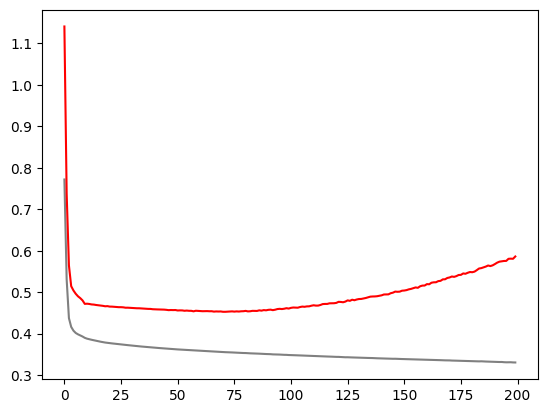

In [102]:
plt.plot(train_history, 'gray')
plt.plot(valid_history, 'r')

### Evaluate Model

In [103]:
# train_pred = model.predict(X_train)
def standardize_output(arr):
    return (1 / (1 + np.e ** (-1 * arr)))

def find_best_prob(pred_prob, actual, display=True):
    best_prob = 0
    best_score = -np.inf
    prob_interval = 0.05
    with np.errstate(divide='ignore'):
        if display:
            print(
                f"i\t" + 
                f"roc_auc\t" + 
                f"acc\t" + 
                f"conf_matrix" + 
                "\n==================================================="
            )
        for i in np.arange(0, 1.0, prob_interval):
            pred = pred_prob > i
            metrics = get_metrics(pred, actual, display=False)
            
            score = metrics[8]

            if display:
                print(
                    f"{i:.2f}\t" + 
                    f"{score:0.3f}\t" + 
                    f"{((metrics[0] + metrics[3]) / np.sum(metrics[:4]) * 100):.2f}\t" + 
                    f"{metrics[:4]}"
                )

            if (score > best_score):
                best_score = score
                best_prob = i
    if display: print(f"Best Threshold: {best_prob:0.2f}")
    return best_prob

In [104]:
valid_pred_prob = model(X_valid_tensor).detach().numpy()[:,0]
# valid_pred_prob = standardize_output(valid_pred_prob)
threshold = find_best_prob(valid_pred_prob, y_valid)
valid_pred = valid_pred_prob > threshold

test_pred_prob = model(X_test_tensor).detach().numpy()[:,0]
# test_pred_prob = standardize_output(test_pred_prob)
test_pred = test_pred_prob > threshold

i	roc_auc	acc	conf_matrix
0.00	0.549	29.14	[37, 338, 0, 102]
0.05	0.728	62.89	[208, 167, 10, 92]
0.10	0.731	67.30	[236, 139, 17, 85]
0.15	0.751	71.49	[258, 117, 19, 83]
0.20	0.758	73.17	[267, 108, 20, 82]
0.25	0.739	75.26	[286, 89, 29, 73]
0.30	0.725	77.57	[305, 70, 37, 65]
0.35	0.689	78.62	[322, 53, 49, 53]
0.40	0.655	78.83	[333, 42, 59, 43]
0.45	0.606	79.04	[348, 27, 73, 29]
0.50	0.548	79.45	[367, 8, 90, 12]
0.55	0.527	79.45	[373, 2, 96, 6]
0.60	0.502	78.41	[373, 2, 101, 1]
0.65	0.500	78.62	[375, 0, 102, 0]
0.70	0.500	78.62	[375, 0, 102, 0]
0.75	0.500	78.62	[375, 0, 102, 0]
0.80	0.500	78.62	[375, 0, 102, 0]
0.85	0.500	78.62	[375, 0, 102, 0]
0.90	0.500	78.62	[375, 0, 102, 0]
0.95	0.500	78.62	[375, 0, 102, 0]
Best Threshold: 0.20


In [105]:
print("Validation:")
get_metrics(valid_pred, y_valid)
print("===========================")
print("Testing:")
get_metrics(test_pred, y_test)

Validation:
Accuracy: 0.7317
tn:  267,  fp:  108,  fn:  20, tp:  82
Precision:			0.43158
Recall:				0.80392
TPR:				0.80392
FPR:				0.71200
Positive likelihood ratio:	1.12910
Negative likelihood ratio:	0.88566
ROC-AUC Score:	0.75796
Testing:
Accuracy: 0.7366
tn:  355,  fp:  143,  fn:  14, tp:  84
Precision:			0.37004
Recall:				0.85714
TPR:				0.85714
FPR:				0.71285
Positive likelihood ratio:	1.20241
Negative likelihood ratio:	0.83166
ROC-AUC Score:	0.78500


# Visualizing Feature Impact

In [106]:
from scipy import stats

In [107]:
X_valid_df = pd.DataFrame(
    # np.array([stats.zscore(col) for col in X_valid])
    np.array([stats.zscore(col) for col in X_valid.T]).T
    # X_valid
)
X_valid_df.rename(
    dict(zip(np.arange(X.shape[1]), feature_matrix.iloc[:,1:].columns)),
    axis=1,
    inplace=True
)
X_valid_df['pred_y'] = valid_pred.astype(float)
X_valid_df['y'] = y_valid
X_valid_df.head()

,LOAN_mean,meanEXTERNAL_TRANSFER,medianMORTGAGE,medianINSURANCE,meanLOAN,minESSENTIAL_SERVICES,ATM_CASH_mean,medianFOOD_AND_BEVERAGES,GROCERIES_count,HOME_IMPROVEMENT_mean,...,medianUNCATEGORIZED,meanCREDIT_CARD_PAYMENT,medianGIFTS_DONATIONS,minBNPL,maxbalance,TAX_prop,minENTERTAINMENT,meanAUTOMOTIVE,pred_y,y
0,-0.148498,0.077739,-0.155053,-0.670772,-0.144597,0.427379,-0.180935,-0.102182,0.439538,-0.378917,...,-0.275727,1.325403,-0.256987,-0.218458,2.130508,-0.153520,-0.137667,-0.058862,0.0,0.0
1,-0.175404,-0.284006,-0.155053,0.127967,-0.166879,-0.234655,-0.337227,-0.080831,-0.130887,-0.378917,...,-0.190648,-0.248437,-0.266380,-0.218458,-0.287457,-0.153520,-0.143257,-0.080193,1.0,0.0
2,-0.184829,-0.173473,-0.155053,-0.670772,-0.184910,-0.315786,0.429210,-0.074015,-0.709686,-0.378917,...,-0.277783,-0.249508,-0.266380,-0.218458,-0.328896,-0.153520,0.287451,-0.060521,1.0,0.0
3,-0.210394,-0.248651,-0.155053,-0.659127,-0.208203,-0.359348,-0.272268,-0.123307,0.967051,-0.378917,...,-0.251369,-0.378945,-0.266380,4.130425,-0.317280,-0.153520,0.176180,-0.075335,1.0,0.0
4,0.171698,-0.323962,-0.155053,3.862338,0.108478,-0.309546,-0.318931,-0.120464,0.568518,-0.074519,...,-0.216116,-0.222795,0.038875,-0.218458,-0.265151,0.776192,-0.194633,-0.045769,0.0,0.0


In [108]:
valid_pred_0 = X_valid_df[X_valid_df['pred_y'] == 0].iloc(axis=1)[:-2]
valid_pred_1 = X_valid_df[X_valid_df['pred_y'] == 1].iloc(axis=1)[:-2]

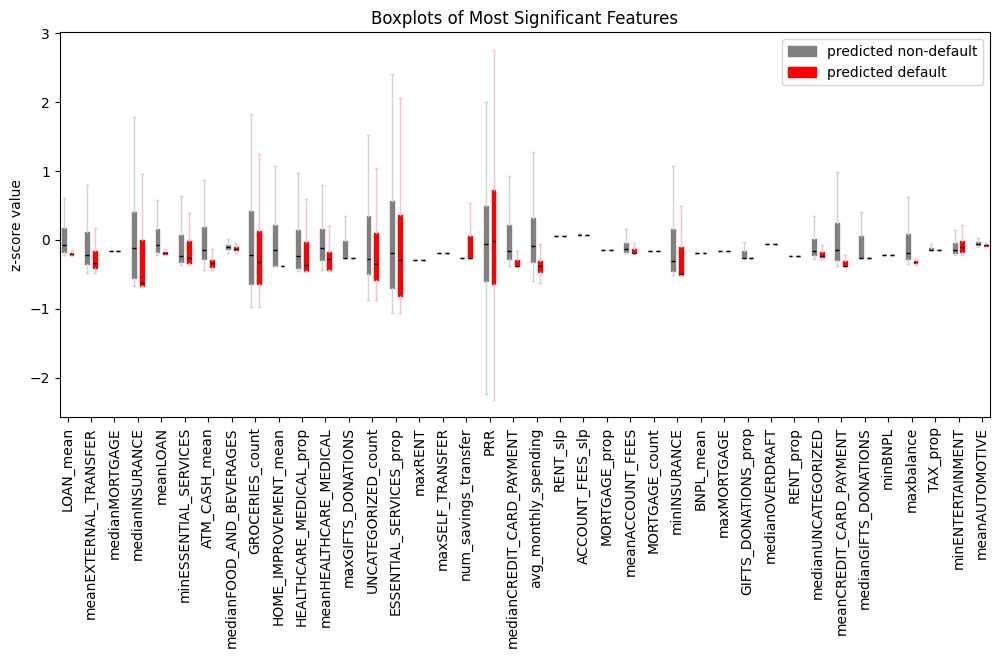

In [119]:
nfeatures = valid_pred_0.shape[1]
step_size = 3

fig, ax = plt.subplots(figsize=(12, 5))

bp0 = ax.boxplot(
    valid_pred_0, 
    positions=np.arange(0,nfeatures*step_size,step_size),
    patch_artist=True, 
    boxprops=dict(facecolor='gray', color='gray'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='lightgray'),
    capprops=dict(color='lightgray'),
    showfliers=False
)

bp1 = ax.boxplot(
    valid_pred_1, 
    positions=np.arange(1,nfeatures*step_size,step_size),
    patch_artist=True, 
    boxprops=dict(facecolor='red', color='red'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='pink'),
    capprops=dict(color='pink'),
    showfliers=False
)

ax.set_title("Boxplots of Most Significant Features")
ax.legend([bp0["boxes"][0], bp1["boxes"][0]], ['predicted non-default', 'predicted default'], loc='upper right')
ax.set_ylabel('z-score value')
# ax.set_ylim(-0.4, 0.3)
ax.set_xticks(np.arange(0.5, nfeatures*step_size,step_size))
ax.set_xticklabels(valid_pred_0.columns, rotation=90);

In [125]:
X_valid_raw = pd.DataFrame(X_valid)
X_valid_raw.rename(
    dict(zip(np.arange(X.shape[1]), feature_matrix.iloc[:,1:].columns)),
    axis=1,
    inplace=True
)
X_valid_raw['pred_y'] = valid_pred.astype(float)
X_valid_raw['y'] = y_valid

X_valid_raw_0 = X_valid_raw[X_valid_raw['pred_y'] == 0]
X_valid_raw_1 = X_valid_raw[X_valid_raw['pred_y'] == 1]

raw_0_median_nonzero = [np.median(valid_pred_0[col][valid_pred_0[col] != 0]) for col in valid_pred_0.columns[:-2]]
raw_1_median_nonzero = [np.median(valid_pred_1[col][valid_pred_1[col] != 0]) for col in valid_pred_1.columns[:-2]]

median_dist = [0 if np.isnan(x) else x for x in (np.array(raw_0_median_nonzero) - np.array(raw_1_median_nonzero))]
median_dist = dict(zip(valid_pred_0.columns[:-2], median_dist))
# median_dist = {key: median_dist[key] for key in sorted(median_dist, key=lambda x: median_dist[x], reverse=True)}

/var/folders/0_/tww2_mb540ldlyk4js_q8l8r0000gn/T/ipykernel_71707/1501314256.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keys, rotation=90);


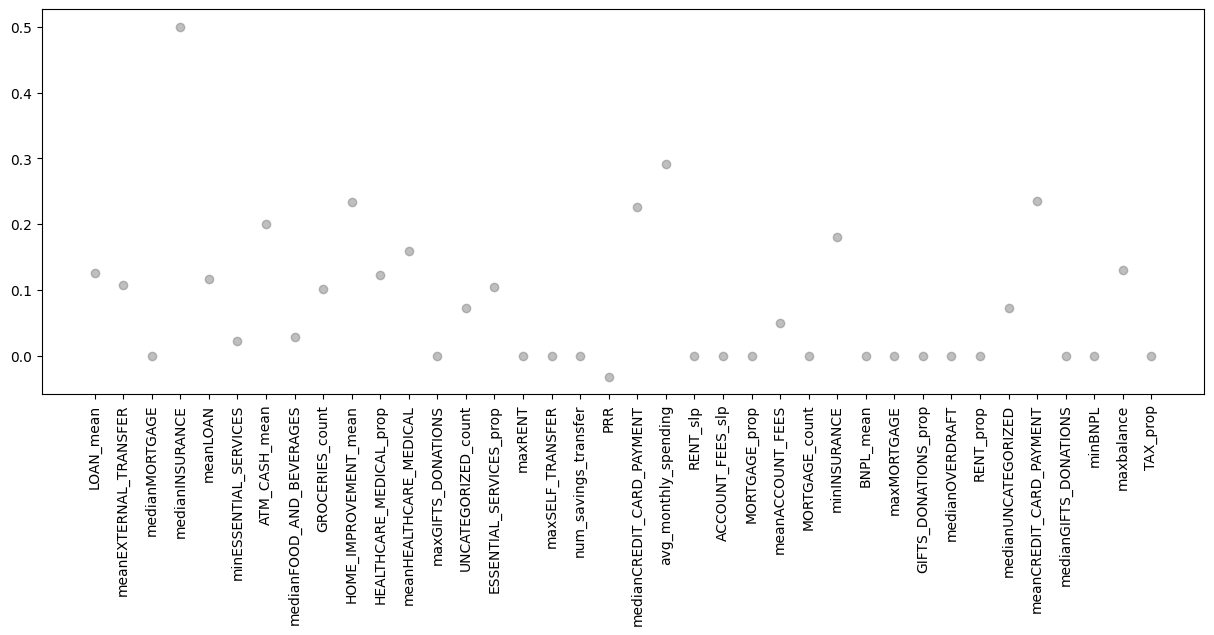

In [128]:
keys = median_dist.keys()
values = median_dist.values()

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(
    keys, 
    values,
    color='gray',
    alpha=0.5
)
ax.set_xticklabels(keys, rotation=90);